## 1. 문제정의(목표설정)
- 500명의 키와 몸무게, 비만도 레이블(lable) 데이터를 이용해 비만 정도를 판단하는 머신러닝 모델을 만들어보자!
- 머신러닝 라이브러리인 sklearn 을 사용해보자

In [1]:
!pip install scikit-learn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier    # KNN 모델 클래스
from sklearn import metrics               # 머신러닝 모델 평가를 위한 클래스

## 2. 데이터 수집
- csv파일 로드

In [7]:
# 데이터프레임으로 출력해보세요(인덱스 컬럼은 label로 설정)
bmi_data = pd.read_csv("data/bmi_500.csv", index_col="Label")
bmi_data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [9]:
bmi_data.info()     # 전체 행(row) 수, 결측치 여부, 데이터 타입 등 파악

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [10]:
bmi_data["Gender"].value_counts()

Gender
Female    255
Male      245
Name: count, dtype: int64

In [11]:
# 유니크함수로 label의 종류(class) 확인
bmi_data.index.unique()    # 정답의 개수는 6개

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

## 3. 데이터 전처리
- 현재는 전처리가 필요없는 학습용 데이터로 진행

# 4. 탐색적 데이터 분석

In [12]:
# 기술통계치 확인(수치형, 문자형 데이터가 섞여있을 경우 수치형 데이터 우선으로 기술통계치가 출력됨)
bmi_data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [13]:
bmi_data.loc["Normal"]

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


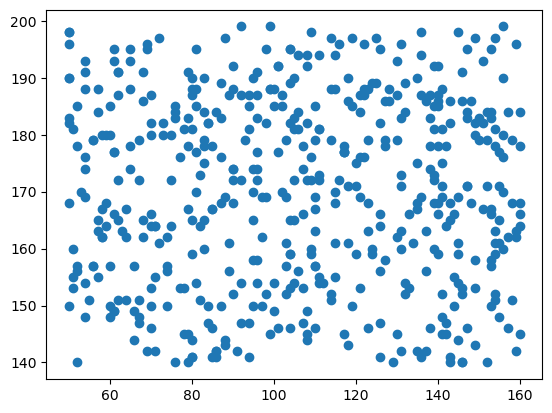

In [15]:
# 각 비만도 class별로 시각화 해보기

# 산점도로 전체 그래프 표시
plt.scatter(bmi_data["Weight"], bmi_data["Height"]);

In [24]:
# 클래스명과 컬러를 입력받아 키와 몸무게 데이터를 산점도로 표시하는 사용자 정의 함수
def myScatter(class_name, color) :
    # 우리가 원하는 class명칭에 맞는 데이터프레임만 추출
    temp = bmi_data.loc[class_name]
    plt.scatter(temp["Weight"],
                temp["Height"],
                c = color,          # 색상 설정
                label = class_name  # 명칭 설정
               )

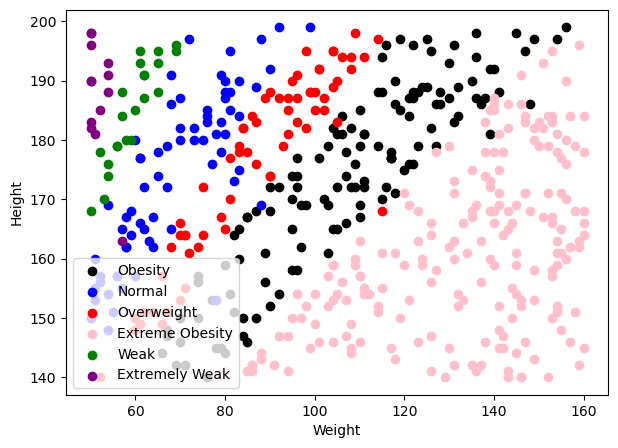

In [25]:
plt.figure(figsize=(7,5))

# 작성된 함수에 클래스 명과 색상 입력
myScatter('Obesity','black')
myScatter('Normal','blue')
myScatter('Overweight', 'red')
myScatter('Extreme Obesity', 'pink')
myScatter('Weak', 'green')
myScatter('Extremely Weak', 'purple')

plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [ ]:
'Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'

## 5. 모델링(모델선택, 학습, 평가)
1. 문제(x), 정답(y) 데이터 분리
2. 학습(train), 평가(test) 데이터 분리
3. 모델 생성 및 학습
4. 모델 평가

In [26]:
data = pd.read_csv("data/bmi_500.csv")
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [27]:
# 문제(x), 정답(y) 데이터로 분리
x = data.loc[ : , "Height":"Weight" ]
y = data.loc[ : , 'Label']

In [28]:
x

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [29]:
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

In [30]:
print(x.shape)
print(y.shape)              # 1이 생략되어 잇는 상태.

(500, 2)
(500,)


In [31]:
# 학습(train), 평가(test) 데이터 분리
# 학습 데이터 70%, 평가 데이터30%로 분리(상위 350개 데이터는 학습용, 나머지 150개 데이터는 평가용)
x_train = x.iloc[:350, :]
y_train = y.iloc[:350]
x_test = x.iloc[350:, :]
y_test = y.iloc[350:]

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [71]:
# KNN모델 객체(이웃수는 전체 학습데이터를 제곱근 한 값으로 먼저 기준을 잡고 테스트)
 # n_neighbors : k값(이웃의 수) 설정
knn_model = KNeighborsClassifier(n_neighbors=10)

# 하이퍼피라미터는 실험과 테스트를 통해 현재 데이터에 적절한 값을 사람이 찾아내야함

In [72]:
# fit : KNN모델 학습(학습용 문제와 정답을 넣어서 학습)
knn_model.fit(x_train, y_train)

# 모델 객체는 x_train과 y_train에 대한 패턴이나 규칙을 학습하고 있음

KNeighborsClassifier(n_neighbors=10)

In [73]:
# 학습한 모델로 평가 문제 데이터를 사용하여 정답을 예측
pred = knn_model.predict(x_test)
pred

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [74]:
len(pred)
# 평가용 x_test 데이터가 150개 이므로 그에 맞는 정답이 각각 1개씩해서 총 150개로 나옴

150

In [75]:
y_test

350             Normal
351             Normal
352             Normal
353    Extreme Obesity
354     Extremely Weak
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 150, dtype: object

### 정확도 평가

In [87]:
# 모델이 예측한 값과 실제 정답을 넣고 얼마나 맞췄는지 정확도를 평가하는 코드
metrics.accuracy_score(pred, y_test)

0.94

In [77]:
# score : 예측 및 정확도 평가를 한번에 실행
knn_model.score(x_test, y_test)

0.94

### 재현율 평가

In [78]:
metrics.recall_score(pred, y_test, average='weighted')
# average : 분위기 유형을 지정
 # binary : 2개 중 하나 선택, 이진분류(디폴트 값)
 # weighted : 3개 이상에서 하나 선택, 다중분류

0.94

### 정밀도 평가

In [81]:
metrics.precision_score(pred, y_test, average='weighted')

0.9441971361971362

### 분류 평가 지표 레포트 출력 (성적표)

In [82]:
from sklearn.metrics import classification_report

pred = knn_model.predict(x_test)
print(classification_report(pred, y_test))

# support : 데이터 개수

                 precision    recall  f1-score   support

Extreme Obesity       1.00      0.94      0.97        67
 Extremely Weak       1.00      1.00      1.00         3
         Normal       0.92      0.92      0.92        25
        Obesity       0.89      0.97      0.93        32
     Overweight       0.92      0.86      0.89        14
           Weak       0.82      1.00      0.90         9

       accuracy                           0.94       150
      macro avg       0.92      0.95      0.93       150
   weighted avg       0.94      0.94      0.94       150



### 학습된 모델에 내 키와 몸무게를 넣어서 확인해보자!

In [83]:
x_test

,Height,Weight
350,184,83
351,197,88
352,160,51
353,184,153
354,190,50
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [86]:
knn_model.predict([[164, ]])

C:\Users\82108\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal'], dtype=object)